# 🎮 Video Game Sales and Engagement Analysis
This notebook provides a complete end-to-end solution using Python, SQL, and EDA.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [50]:
games = pd.read_csv("games.csv")
vgsales = pd.read_csv("vgsales.csv")

In [8]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [10]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
# Check missing values
games.dropna(subset=['Title', 'Rating', 'Genres'], inplace=True)
vgsales.dropna(subset=['Name', 'Global_Sales'], inplace=True)

# Normalize and clean text
games['Title'] = games['Title'].str.strip().str.lower()
vgsales['Name'] = vgsales['Name'].str.strip().str.lower()

# Drop duplicates
games.drop_duplicates(inplace=True)
vgsales.drop_duplicates(inplace=True)

In [16]:
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,elden ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,the legend of zelda: breath of the wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,hollow knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,back to the future: the game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,team sonic racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,dragon's dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,baldur's gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [18]:
merged = pd.merge(games, vgsales, left_on=['Title', 'Release Date'], right_on=['Name','Platform'], how='inner')
merged.drop('Name', axis=1, inplace=True)

In [20]:
merged

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [22]:
# conn = sqlite3.connect("videogame_analysis.db")
# games.to_sql("games", conn, if_exists="replace", index=False)
# vgsales.to_sql("vgsales", conn, if_exists="replace", index=False)
# merged.to_sql("merged_data", conn, if_exists="replace", index=False)

0

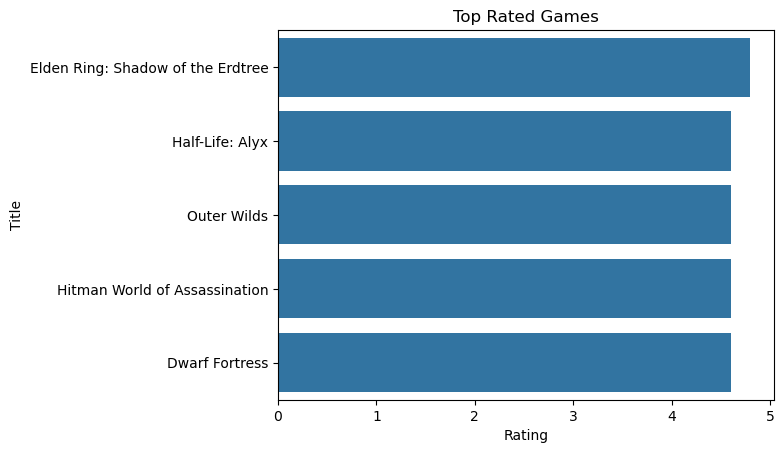

In [140]:
top_rated = games.sort_values(by="Rating", ascending=False).head(5)
sns.barplot(x='Rating', y='Title', data=top_rated)
plt.title("Top Rated Games")
plt.show()

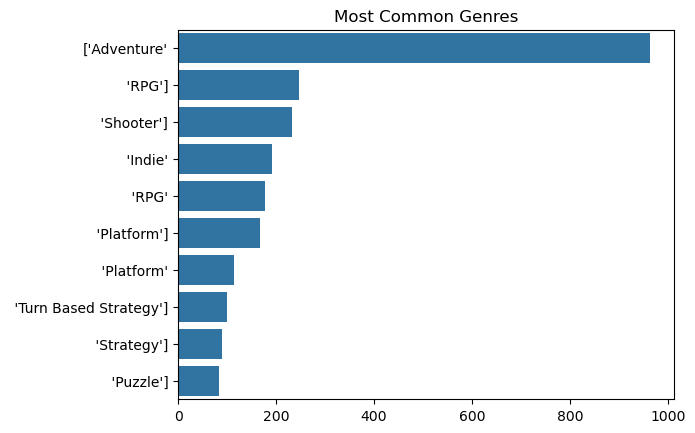

In [26]:
from collections import Counter
genre_list = games['Genres'].str.split(',').sum()
genre_counts = Counter(genre_list)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()))
plt.title("Most Common Genres")
plt.show()

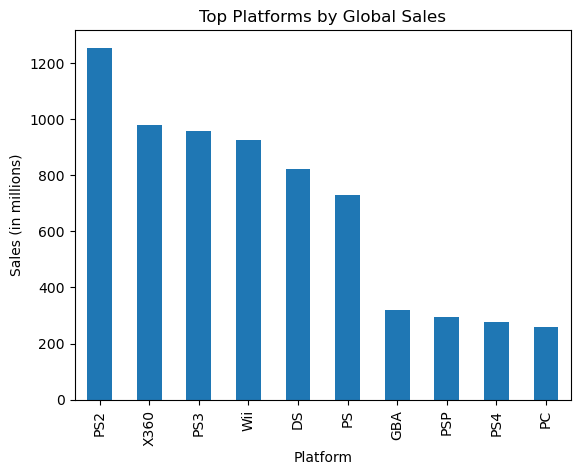

In [28]:
platform_sales = vgsales.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind="bar", title="Top Platforms by Global Sales")
plt.ylabel("Sales (in millions)")
plt.show()

C:\Users\naruk\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\naruk\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


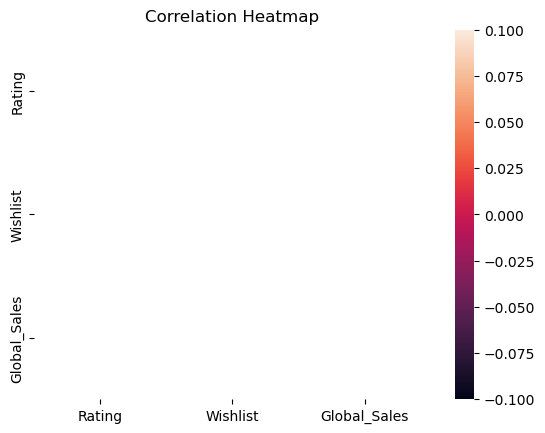

In [32]:
correlation = merged[['Rating', 'Wishlist', 'Global_Sales']].corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [80]:
!pip install psycopg
import psycopg
!pip install psycopg2
import psycopg2

In [81]:
DB_CONFIG = {
    "dbname" == "ramji",
    "username" == "postgres",
    "password" == "Ktm@9291",
    "host" == "localhost",
    "port" == 5432
}

connection = psycopg2.connect(host = "localhost",database = "ramji", user = "postgres" , password ="Ktm@9291")
cur = connection.cursor()

In [54]:

# Drop redundant columns
games.drop(columns=['Unnamed: 0', 'Summary', 'Number of Reviews'], inplace=True, errors='ignore')

# Fill Rating missing values
games['Rating'] = games['Rating'].fillna(games['Rating'].mean())

# Fill Team missing
games['Team'] = games['Team'].fillna('Unknown')

# Fill Sales missing values
vgsales['Year'] = vgsales['Year'].fillna(0).astype(int)
vgsales['Publisher'] = vgsales['Publisher'].fillna('Unknown Publisher')

In [56]:

# Genres mapping
genre_map = {'Role-Playing': 'RPG', 'Platform': 'Platformer'}
vgsales['Genre'] = vgsales['Genre'].replace(genre_map)


In [62]:

# Publisher mapping
publisher_map = {
    'Ubisoft Entertainment': 'Ubisoft',
    'Bethesda Softworks': 'Bethesda',
    'Square': 'Square Enix',
    'EA Games': 'Electronic Arts'
}
vgsales['Publisher'] = vgdef parse_count(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        if x.endswith('K'):
            return float(x[:-1]) * 1000
        if x.endswith('M'):
            return float(x[:-1]) * 1_000_000
        if x == '' or x.lower() == 'nan':
            return None
        return float(x)
    return x

cols = ['Plays', 'Playing', 'Backlogs', 'Wishlist']
for c in cols:
    games[c] = games[c].apply(parse_count)
sales['Publisher'].replace(publisher_map)
games['Team'] = games['Team'].replace(publisher_map, regex=True)


In [138]:
def parse_count(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        if x.endswith('K'):
            return float(x[:-1]) * 1000
        if x.endswith('M'):
            return float(x[:-1]) * 1_000_000
        if x == '' or x.lower() == 'nan':
            return None
        return float(x)
    return x

cols = ['Plays', 'Playing', 'Backlogs', 'Wishlist']
for c in cols:
    games[c] = games[c].apply(parse_count)


In [66]:
games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
games['Year'] = games['Release Date'].dt.year
games.drop_duplicates(subset=['Title', 'Release Date'], inplace=True)

In [96]:
!pip install psycopg
import psycopg
!pip install psycopg2
import psycopg2
import psycopg2
from psycopg2 import sql  

DB_CONFIG = {
    "dbname" == "ramji",
    "username" == "postgres",
    "password" == "Ktm@9291",
    "host" == "localhost",
    "port" == 5432
}

connection = psycopg2.connect(host = "localhost",database = "ramji", user = "postgres" , password ="Ktm@9291")
cur = connection.cursor()
conn.autocommit = True           # DDL is auto-committed; omit if you prefer manual commits
cur = conn.cursor()

In [114]:
# 📂 3. SQL Schema Scripts
# 3.1 Tables

cur.execute("""
CREATE TABLE Game (
    game_id SERIAL PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    release_date DATE,
    genre VARCHAR(100),
    rating DECIMAL(2,1),
    plays INTEGER,
    backlogs INTEGER,
    wishlists INTEGER,
    reviews_count INTEGER
);
""")

cur.execute("""
CREATE TABLE Platform (
    platform_id SERIAL PRIMARY KEY,
    name VARCHAR(50) UNIQUE NOT NULL
);
""")

cur.execute("""
CREATE TABLE Publisher (
    publisher_id SERIAL PRIMARY KEY,
    name VARCHAR(100) UNIQUE NOT NULL
);
""")

cur.execute("""
CREATE TABLE Sales (
    sales_id SERIAL PRIMARY KEY,
    game_id INTEGER NOT NULL,
    platform_id INTEGER NOT NULL,
    publisher_id INTEGER NOT NULL,
    year INTEGER,
    na_sales DECIMAL(6,2),
    eu_sales DECIMAL(6,2),
    jp_sales DECIMAL(6,2),
    other_sales DECIMAL(6,2),
    global_sales DECIMAL(6,2),
    FOREIGN KEY (game_id) REFERENCES Game(game_id),
    FOREIGN KEY (platform_id) REFERENCES Platform(platform_id),
    FOREIGN KEY (publisher_id) REFERENCES Publisher(publisher_id)
);
""")

cur.execute("""
CREATE TABLE MergedGameStats (
    game_id INTEGER PRIMARY KEY,
    title VARCHAR(255),
    genre VARCHAR(100),
    release_year INTEGER,
    rating DECIMAL(2,1),
    plays INTEGER,
    wishlists INTEGER,
    backlogs INTEGER,
    global_sales DECIMAL(8,2),
    na_sales DECIMAL(8,2),
    eu_sales DECIMAL(8,2),
    jp_sales DECIMAL(8,2),
    FOREIGN KEY (game_id) REFERENCES Game(game_id)
);
""")



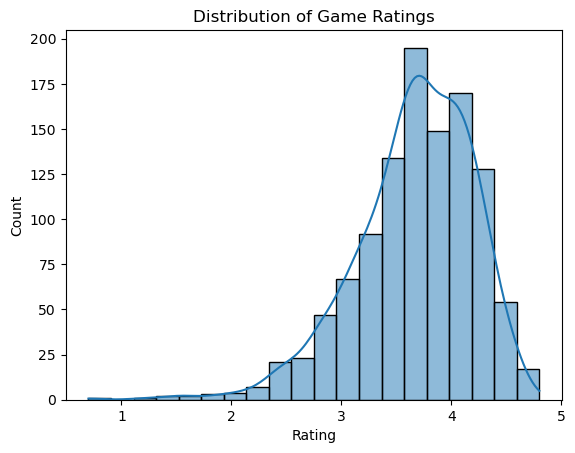

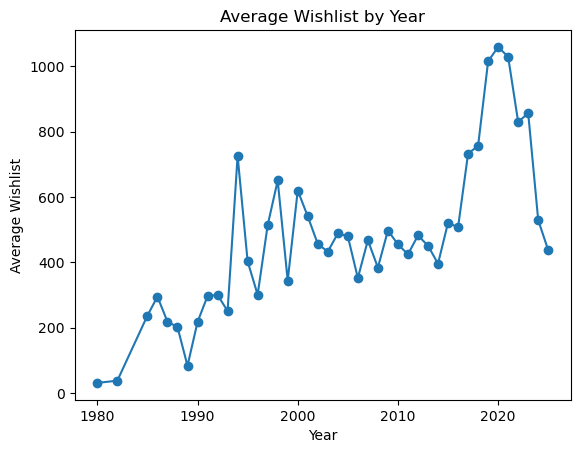

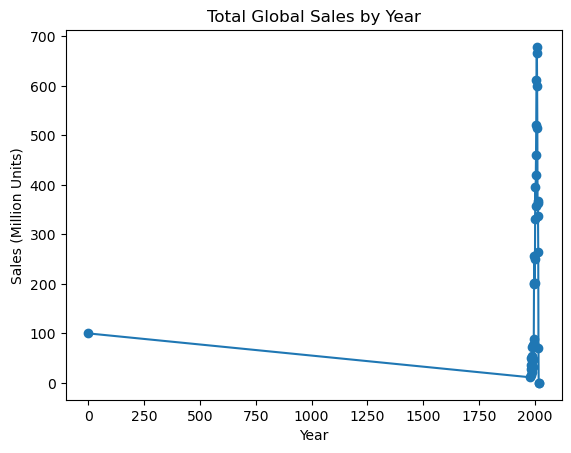

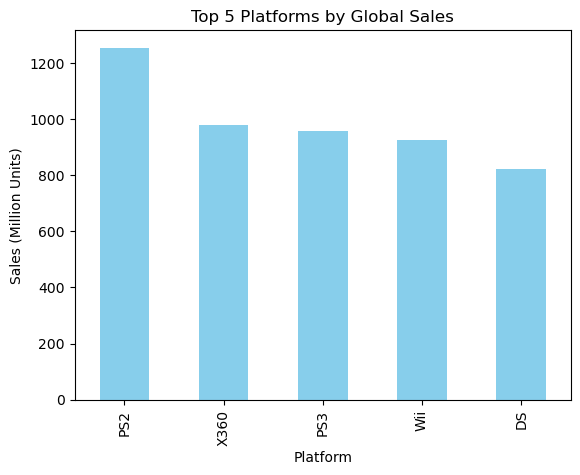

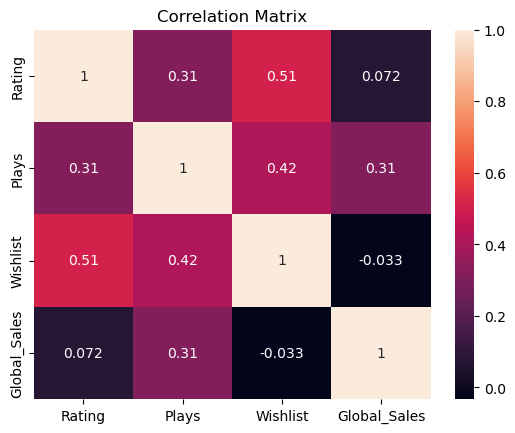

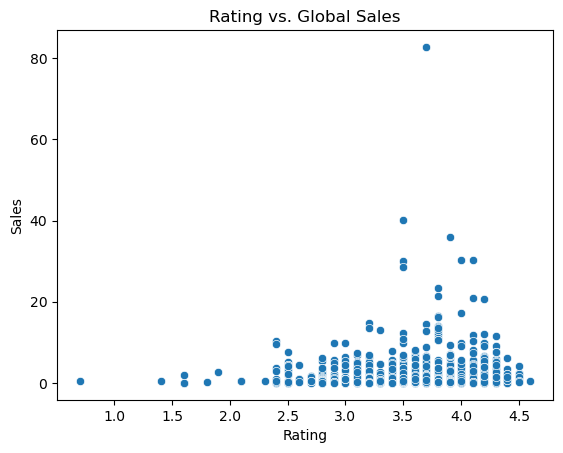

In [129]:
# 📂 4. Exploratory Data Analysis
# 4.1 Ratings Distribution
sns.histplot(games['Rating'], bins=20, kde=True)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# 4.2 Average Wishlist by Year
avg_wishlist = games.groupby('Year')['Wishlist'].mean().dropna()
avg_wishlist.plot(marker='o')
plt.title('Average Wishlist by Year')
plt.xlabel('Year')
plt.ylabel('Average Wishlist')
plt.show()


# 4.3 Sales Over Time
sales_per_year = vgsales.groupby('Year')['Global_Sales'].sum()
sales_per_year.plot(marker='o')
plt.title('Total Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales (Million Units)')
plt.show()


# 4.4 Top Platforms
top_platforms = vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)
top_platforms.plot(kind='bar', color='skyblue')
plt.title('Top 5 Platforms by Global Sales')
plt.ylabel('Sales (Million Units)')
plt.show()



# 4.5 Correlation Analysis
merged = pd.merge(
    games, vgsales,
    left_on='Title', right_on='Name'
)

corr = merged[['Rating', 'Plays', 'Wishlist', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

sns.scatterplot(x='Rating', y='Global_Sales', data=merged)
plt.title('Rating vs. Global Sales')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()



In [131]:
games.to_csv("cleaned_games.csv", index=False)
vgsales.to_csv("cleaned_vgsales.csv", index=False)
merged.to_csv("merged_games_data.csv", index=False)

In [136]:
# 5. Power BI Dashboard
!pip install powerbiclient msal requests

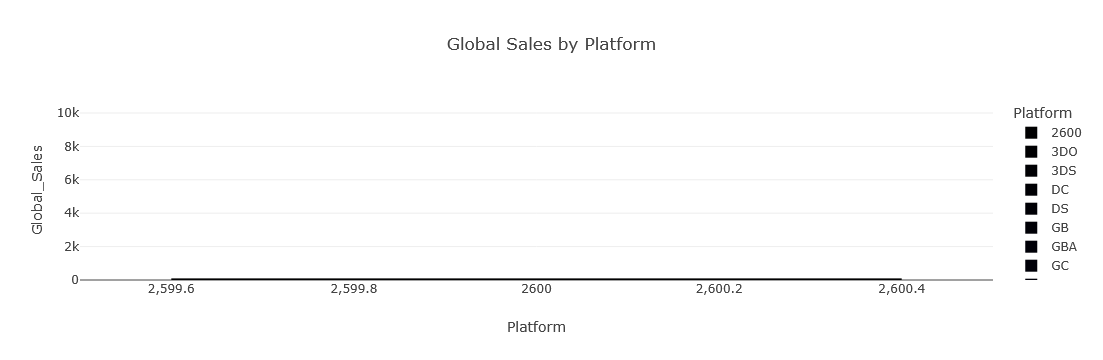

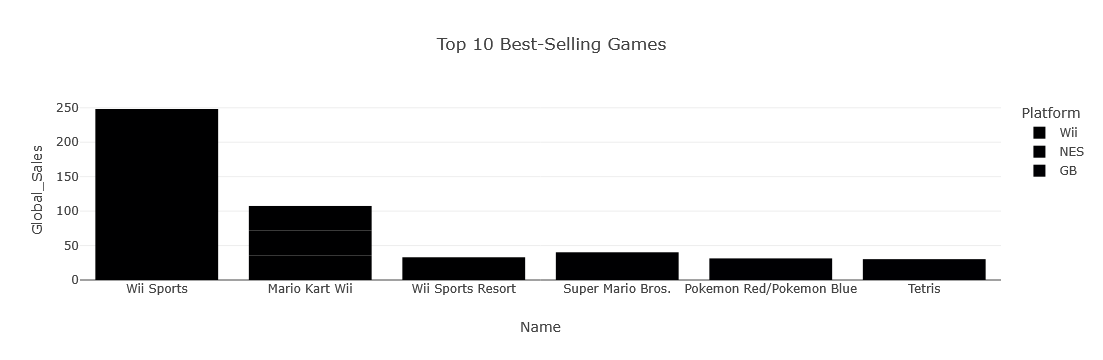

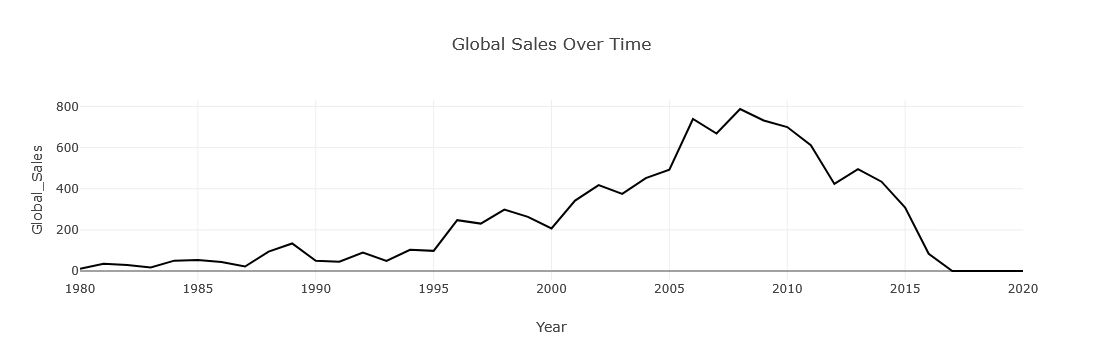

In [170]:
import pandas as pd
import plotly.express as px
!pip install plotly

# Load your data
games = pd.read_csv('games.csv')
sales = pd.read_csv('vgsales.csv')

# Merge data
merged = sales.merge(games, left_on='Name', right_on='Title', how='left')

# Global Sales by Platform
fig1 = px.bar(
    merged.groupby("Platform")["Global_Sales"].sum().reset_index(),
    x="Platform", y="Global_Sales",
    title="Global Sales by Platform", color="Platform"
)
fig1.show()

# Top 10 games by global sales
top_10 = merged.sort_values("Global_Sales", ascending=False).head(10)
fig2 = px.bar(
    top_10, x='Name', y='Global_Sales',
    color='Platform', title='Top 10 Best-Selling Games'
)
fig2.show()

# Global Sales trend by year
merged_clean = merged.dropna(subset=["Year"])
fig3 = px.line(
    merged_clean.groupby("Year")["Global_Sales"].sum().reset_index(),
    x="Year", y="Global_Sales", title="Global Sales Over Time"
)
fig3.show()

In [172]:
# # Save this in app.py and run: streamlit run app.py
# %%writefile app.py
# import streamlit as st
# import pandas as pd
# import plotly.express as px

# sales = pd.read_csv('vgsales.csv')
# st.title("Video Game Sales Dashboard")

# fig = px.bar(sales.groupby("Platform")["Global_Sales"].sum().reset_index(),
#              x="Platform", y="Global_Sales", title="Sales by Platform")
# st.plotly_chart(fig)



In [166]:
# !streamlit run app.py

^C


In [ ]:
# import pandas as pd
# import plotly.express as px

# # Load data
# games = pd.read_csv('games.csv')
# sales = pd.read_csv('vgsales.csv')
# merged = sales.merge(games, left_on='Name', right_on='Title', how='left')

# # Global Sales by Genre
# fig = px.bar(
#     merged.groupby("Genre")["Global_Sales"].sum().reset_index(),
#     x="Genre", y="Global_Sales", title="Global Sales by Genre", color="Genre"
# )
# fig.show()


# Power BI Integration Notebook – Video Game Sales & Engagement Project

In [177]:
import pandas as pd

# Adjust the paths if the CSVs live elsewhere
games = pd.read_csv('games.csv')
sales = pd.read_csv('vgsales.csv')

# (Optional) build a quick combined view you can visualise immediately
merged = sales.merge(games, left_on='Name', right_on='Title', how='left')
merged.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,3.7,775,775,"['Simulator', 'Sport']",Bowl like a pro or go for that home run...\n ...,"[""The perfect arcade game. Another type of gam...",18K,39,320,93
1,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,3.7,775,775,"['Simulator', 'Sport']",Bowl like a pro or go for that home run...\n ...,"[""The perfect arcade game. Another type of gam...",18K,39,320,93
2,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,3.7,775,775,"['Simulator', 'Sport']",Bowl like a pro or go for that home run...\n ...,"[""The perfect arcade game. Another type of gam...",18K,39,320,93
3,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,3.5,1.5K,1.5K,"['Adventure', 'Platform']",A side scrolling 2D platformer and first entry...,"[""I actually had no idea this game was so long...",18K,59,733,237
4,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,3.9,1K,1K,['Racing'],Mario Kart Wii is a multiplayer-oriented racin...,"[""Completed to fulfill a childhood dream and i...",19K,88,461,168


In [ ]:
# ---------- 1. QUICK VISUALIZE (auto‑generated report) ----------
from powerbiclient import QuickVisualize, get_dataset_config
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth = DeviceCodeLoginAuthentication()

# Pick any DataFrame – here we use the merged one created above
qv = QuickVisualize(get_dataset_config(merged), auth=device_auth)

# Render an interactive Power BI report right here ⬇️
qv

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code HBCK559FY to authenticate.
